# Whole Slide Image Analysis with HoneyBee
The HoneyBee is a comprehensive toolkit for whole slide image (WSI) analysis, designed to streamline the development and deployment of deep learning models for computational pathology. It provides a unified interface for data loading, preprocessing, model integration, feature extraction, visualization, and advanced analytics, enabling researchers to focus on their core tasks without worrying about the underlying complexities of WSI analysis. In this notebook, we will explore the key features of the HoneyBee toolkit and demonstrate its capabilities through a series of examples.

## Table of Contents
- [Data Loading](#Data-Loading)
- [Preprocessing](#Preprocessing)
    - [Tissue Masking](##Tissue-Masking)
    - [Stain Normalization](##Stain-Normalization)
    - [Stain Seperation](##Stain-Seperation)
    - [Patch Extraction](##Patch-Extraction)
- [Feature Extraction](#Feature-Extraction)

{'aperio': {'AppMag': '20', 'DSR ID': 'ap1258-dsr', 'Date': '01/15/08', 'Filename': '2791', 'Header': 'Aperio Image Library v8.2.43\r\n28560x25196 [0,0 27965x25146] (240x240) JPEG/RGB Q=70', 'ImageID': '2791', 'Left': '46.376050', 'LineAreaXOffset': '0.012096', 'LineAreaYOffset': '-0.021773', 'LineCameraSkew': '0.000989', 'MPP': '0.5001', 'OriginalWidth': '28560', 'Originalheight': '25196', 'ScanScope ID': 'SS1258', 'StripeWidth': '2034', 'Time': '12:30:08', 'Title': 'none', 'Top': '20.047489', 'User': 'c63d0b3e-0ed4-4bd2-b137-81256e033d40'}, 'cucim': {'associated_images': ['thumbnail'], 'channel_names': ['R', 'G', 'B'], 'coord_sys': 'LPS', 'dims': 'YXC', 'direction': [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]], 'dtype': {'bits': 8, 'code': 1, 'lanes': 1}, 'ndim': 3, 'origin': [0.0, 0.0, 0.0], 'path': 'sample.svs', 'resolutions': {'level_count': 3, 'level_dimensions': [[27965, 25146], [6991, 6286], [1747, 1571]], 'level_downsamples': [1.0, 4.00023078918457, 16.00690269470215], 

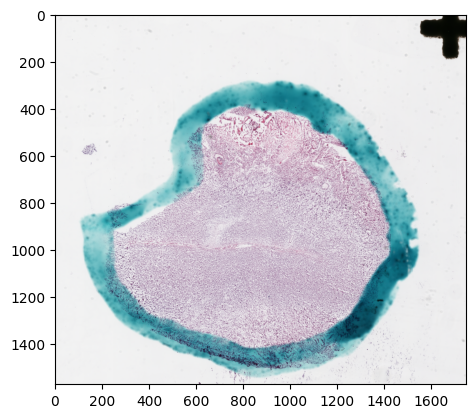

In [1]:
from cucim import CuImage
import torch
import torch.nn as nn
from torchvision import models, transforms
from matplotlib import pyplot as plt

class TissueDetector:
    def __init__(self, model_path, device="cuda"):
        self.device = torch.device(device)
        self.model = self._load_model(model_path)
        self.transforms = transforms.Compose(
            [
                transforms.Resize(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ]
        )

    def _load_model(self, model_path):
        model = models.densenet121(weights=None)
        model.classifier = nn.Linear(1024, 3)
        model.load_state_dict(torch.load(model_path, map_location=self.device))
        return model.to(self.device).eval()

class Stain:
    def __init__(self):
        pass

    def normalize(self):
        pass
    
    def seperate(self):
        pass


class WSI:
    def __init__(self, path):
        self.image_path = path
        self.image = CuImage(path)

    def metadata(self):
        return self.image.metadata

    def thumbnail(self):
        resolutions = self.image.resolutions
        level_dimensions = resolutions["level_dimensions"]
        level_count = resolutions["level_count"]
        region = self.image.read_region(location=[0, 0], size=level_dimensions[level_count - 1], level=level_count - 1)
        return region


input_file = "sample.svs"
slide = WSI(input_file)
print(slide.metadata())
plt.imshow(slide.thumbnail())


---
### Data Loading
---

In [ ]:
import json

# Reading in a WSI
img = CuImage("sample.svs")

In [3]:
# Metadata
print(img.is_loaded)                             # True if image data is loaded & available.
print(img.device)                                # A device type.
print(img.ndim)                                  # The number of dimensions.
print(img.dims)                                  # A string containing a list of dimensions being requested.
print(img.shape)                                 # A tuple of dimension sizes (in the order of `dims`).
print(img.size('XYC'))                           # Returns size as a tuple for the given dimension order.
print(img.dtype)                                 # The data type of the image.
print(img.channel_names)                         # A channel name list.
print(img.spacing())                             # Returns physical size in tuple.
print(img.spacing_units())                       # Units for each spacing element (size is same with `ndim`).
print(img.origin)                                # Physical location of (0, 0, 0) (size is always 3).
print(img.direction)                             # Direction cosines (size is always 3x3).
print(img.coord_sys)                             # Coordinate frame in which the direction cosines are measured. Available Coordinate frame is not finalized yet.
print(img.associated_images)                     # Returns a set of associated image names.
print(json.dumps(img.resolutions, indent=2))     # Returns a dict that includes resolution information.
print(json.dumps(img.metadata, indent=2))        # A metadata object as `dict`
print(img.raw_metadata)                          # A raw metadata string.

True
cpu
3
YXC
[25146, 27965, 3]
[27965, 25146, 3]
<cucim.clara.DLDataType code:DLUInt(1) bits:8 lanes:1>
['R', 'G', 'B']
[1.0, 1.0, 1.0]
['', '', 'color']
[0.0, 0.0, 0.0]
[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]
LPS
{'thumbnail'}
{
  "level_count": 3,
  "level_dimensions": [
    [
      27965,
      25146
    ],
    [
      6991,
      6286
    ],
    [
      1747,
      1571
    ]
  ],
  "level_downsamples": [
    1.0,
    4.00023078918457,
    16.00690269470215
  ],
  "level_tile_sizes": [
    [
      240,
      240
    ],
    [
      240,
      240
    ],
    [
      240,
      240
    ]
  ]
}
{
  "aperio": {
    "AppMag": "20",
    "DSR ID": "ap1258-dsr",
    "Date": "01/15/08",
    "Filename": "2791",
    "Header": "Aperio Image Library v8.2.43\r\n28560x25196 [0,0 27965x25146] (240x240) JPEG/RGB Q=70",
    "ImageID": "2791",
    "Left": "46.376050",
    "LineAreaXOffset": "0.012096",
    "LineAreaYOffset": "-0.021773",
    "LineCameraSkew": "0.000989",
    "MPP": "0.50

(1571, 1747, 3) <class 'numpy.ndarray'>


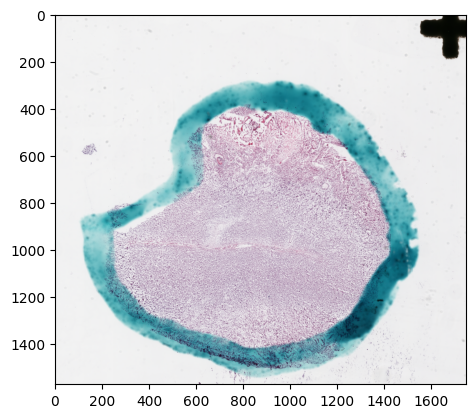

In [5]:
from matplotlib import pyplot as plt
import numpy as np

# Thumbnail
resolutions = img.resolutions
level_dimensions = resolutions["level_dimensions"]
level_count = resolutions["level_count"]
region = img.read_region(location=[0,0], size=level_dimensions[level_count - 1], level=level_count - 1)
region = np.asarray(region)
print(region.shape, type(region))
plt.imshow(region)
plt.show()

---
### Preprocessing
---

In [ ]:
import cucim
import numpy as np
from scipy.ndimage import sobel
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load the SVS image at level 3 using cuCIM
image_path = 'sample.svs'  # Replace with your image path
reader = cucim.CuImage(image_path)

# Select the desired level (e.g., level 3)
level = 2

# Get level dimensions
level_dims = reader.resolutions['level_dimensions'][level]
width, height = level_dims
original_dims = reader.resolutions['level_dimensions'][0]
original_width, original_height = original_dims

# Read the image region at the specified level
image_cuimg = reader.read_region(location=(0, 0), size=(width, height), level=level)
original_cuimg = reader.read_region(location=(0, 0), size=(original_width, original_height), level=0)

# Access the image data as a NumPy array
image_np = np.array(image_cuimg, copy=False)
original_np = np.array(original_cuimg, copy=False)

# Assuming RGB image, discard alpha channel if present
if image_np.shape[2] > 3:
    print('Discarding alpha channel')
    image_np = image_np[:, :, :3]

# Convert the image to grayscale
gray_image = np.mean(image_np.astype(np.float32), axis=2)

# Compute gradients along the x and y axes
grad_x = sobel(gray_image, axis=1)
grad_y = sobel(gray_image, axis=0)

# Compute gradient magnitude
magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Apply Otsu's threshold to find tissue regions
threshold_value = threshold_otsu(magnitude)
tissue_mask = magnitude > threshold_value

# Define the patch size
patch_size = 64  # Adjust as needed

# Slide a window over the tissue mask and record positions where there is tissue
positions = []
step_size = patch_size  # Non-overlapping patches
for y in range(0, tissue_mask.shape[0] - patch_size + 1, step_size):
    for x in range(0, tissue_mask.shape[1] - patch_size + 1, step_size):
        patch = tissue_mask[y:y+patch_size, x:x+patch_size]
        # Check if the patch contains sufficient tissue
        if np.sum(patch) > (0.02 * patch_size * patch_size):  # Adjust threshold as needed for your images
            positions.append((x, y))

# Get the downsampling factor for the selected level
downsample_factor = reader.resolutions['level_downsamples'][level]

# Convert positions to original image coordinates
positions_level0 = [(int(x * downsample_factor), int(y * downsample_factor)) for (x, y) in positions]

# Adjust the patch size to the original resolution
patch_size_level0 = int(patch_size * downsample_factor)

# plot the original image, gradient magnitude, tissue mask, and the patches on the original image
# fig, ax = plt.subplots(2, 2, figsize=(10, 8))
# make it 600 dpi for better quality
fig, ax = plt.subplots(2, 2, figsize=(20, 16), dpi=600)

# Original image
ax[0, 0].imshow(image_np)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# Gradient magnitude
ax[0, 1].imshow(magnitude, cmap='gray')
ax[0, 1].set_title('Gradient Magnitude')
ax[0, 1].axis('off')

# Tissue mask
ax[1, 0].imshow(tissue_mask, cmap='gray')
ax[1, 0].set_title('Tissue Mask')
ax[1, 0].axis('off')

# Patches on the original image
ax[1, 1].imshow(original_np)
ax[1, 1].set_title('Patches on Original Image')
ax[1, 1].axis('off')
for (x, y) in positions_level0:
    rect = Rectangle((x, y), patch_size_level0, patch_size_level0, linewidth=5, edgecolor='k', facecolor='none')
    plt.gca().add_patch(rect)

plt.tight_layout()
plt.show()

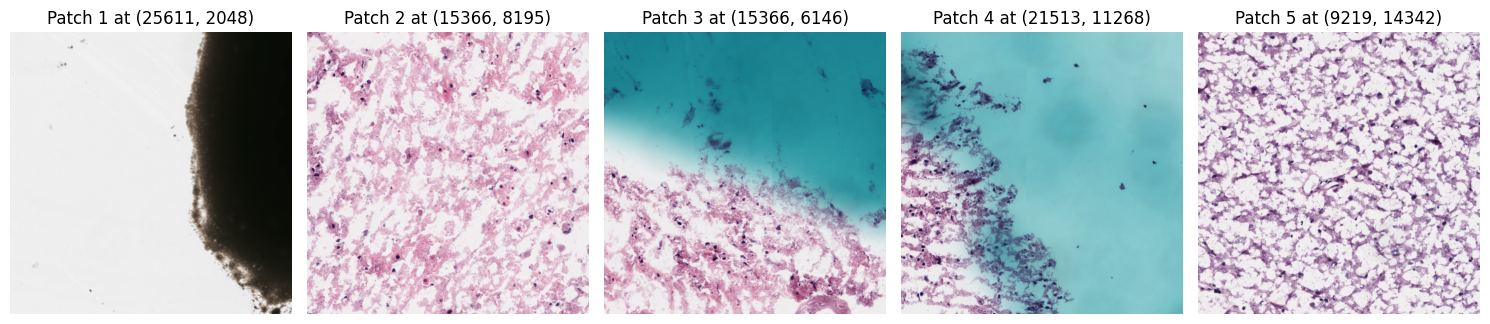

In [117]:
import random

# Randomly select 5 patches from the identified positions
num_patches_to_plot = 5
selected_positions = random.sample(positions_level0, min(len(positions_level0), num_patches_to_plot))

# Plot the selected patches
fig, axs = plt.subplots(1, num_patches_to_plot, figsize=(15, 5))

for i, (x, y) in enumerate(selected_positions):
    # Extract the patch from the original image
    patch = original_np[y:y+patch_size_level0, x:x+patch_size_level0]
    
    # Plot the patch
    axs[i].imshow(patch)
    axs[i].set_title(f'Patch {i+1} at ({x}, {y})')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

#### Tissue Masking
Identifies biologically relevant regions while removing irrelevant background areas.

#### Stain Normalization
Supports several standard methods: 

- Reinhard
- Macenko
- Vahadane
- CustomNormalizer

Breifly describe what stain normalization is important and why these specific methods were selected.

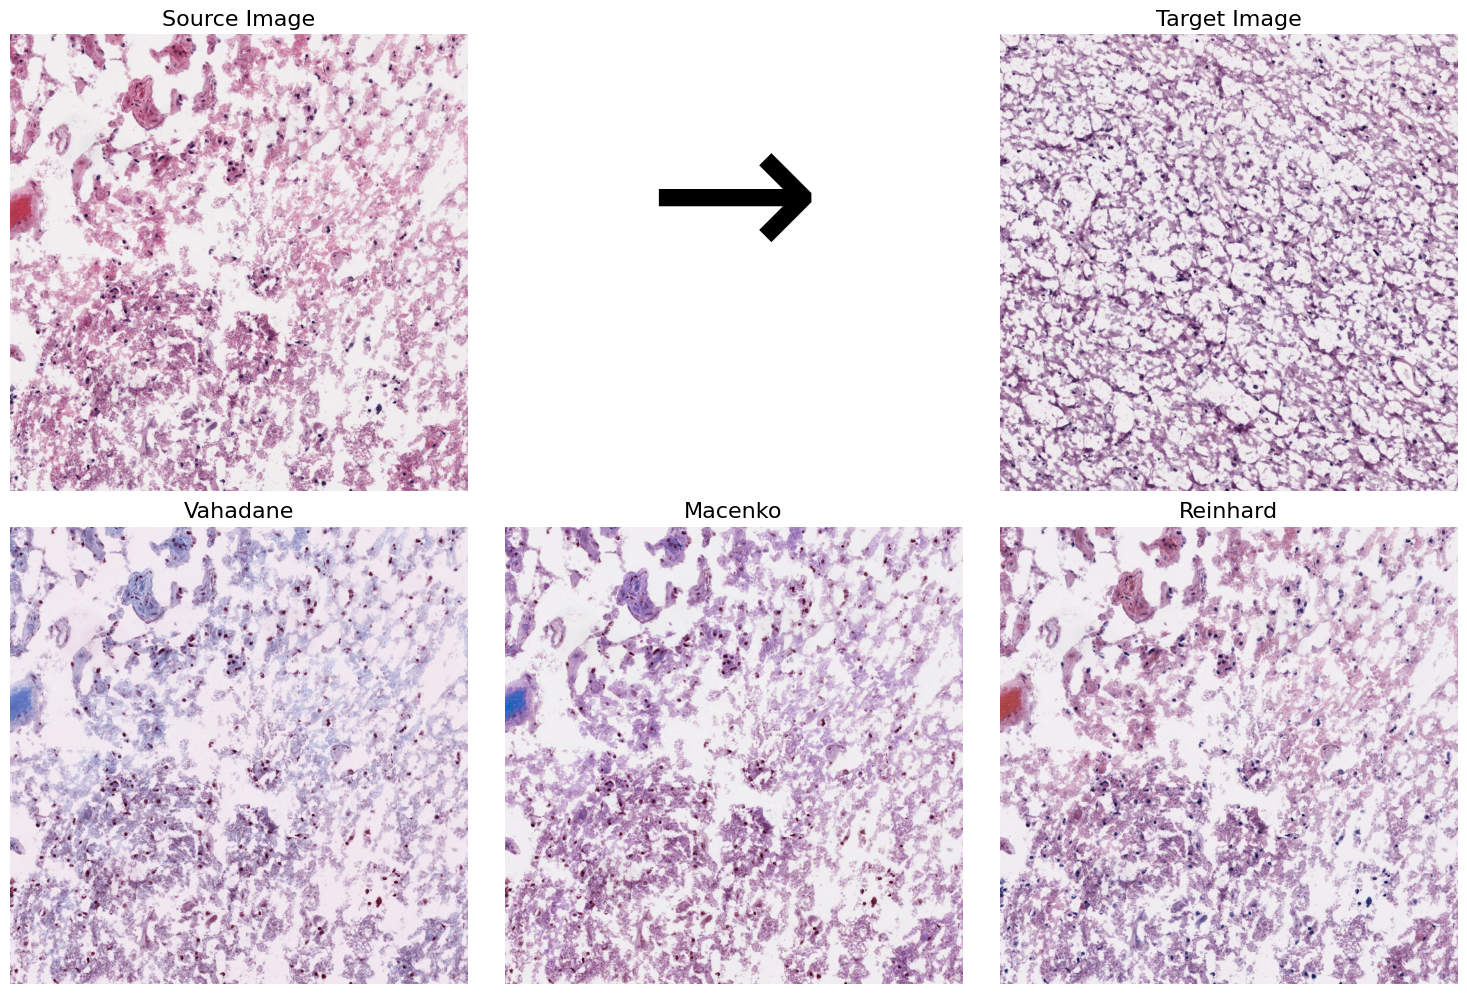

In [38]:
import numpy as np
from skimage.color import rgb2hed, hed2rgb, rgb2lab, lab2rgb
import matplotlib.pyplot as plt
import cucim

# Helper function to extract a tile from the WSI
def extract_tile(wsi_reader, location, level, size):
    tile = wsi_reader.read_region(location=location, level=level, size=size)
    return np.array(tile)

# Vahadane method: Extract stain matrix using singular value decomposition
class VahadaneNormalizer:
    def __init__(self):
        self.target_stain_matrix = None

    def _get_stain_matrix(self, img):
        # Convert to HED (Hematoxylin, Eosin, DAB)
        hed = rgb2hed(img)
        reshaped = hed.reshape(-1, 3)
        u, _, vh = np.linalg.svd(reshaped, full_matrices=False)
        stain_matrix = vh[:2].T
        return stain_matrix

    def _transform(self, img, source_stain_matrix):
        hed = rgb2hed(img)
        reshaped = hed.reshape(-1, 3)
        if self.target_stain_matrix is None:
            raise ValueError("Target stain matrix must be initialized for transformation.")
        transformed = reshaped @ source_stain_matrix @ np.linalg.pinv(self.target_stain_matrix)
        transformed_img = transformed.reshape(img.shape)
        return hed2rgb(transformed_img)

    def fit(self, target_image):
        self.target_stain_matrix = self._get_stain_matrix(target_image)

    def transform(self, source_image):
        source_stain_matrix = self._get_stain_matrix(source_image)
        return self._transform(source_image, source_stain_matrix)

    def fit_transform(self, target_image, source_image):
        self.fit(target_image)
        return self.transform(source_image)
    
class MacenkoNormalizer:
    def __init__(self):
        self.target_stain_matrix = None

    def _get_stain_matrix(self, img):
        lab = rgb2lab(img)
        reshaped = lab[:, :, 1:].reshape(-1, 2)
        u, _, vh = np.linalg.svd(reshaped, full_matrices=False)
        stain_matrix = vh.T
        return stain_matrix

    def _transform(self, img, source_stain_matrix):
        lab = rgb2lab(img)
        reshaped = lab[:, :, 1:].reshape(-1, 2)
        if self.target_stain_matrix is None:
            raise ValueError("Target stain matrix must be initialized for transformation.")
        transformed = reshaped @ source_stain_matrix @ np.linalg.pinv(self.target_stain_matrix)
        transformed_img = lab.copy()
        transformed_img[:, :, 1:] = transformed.reshape(lab[:, :, 1:].shape)
        return lab2rgb(transformed_img)

    def fit(self, target_image):
        self.target_stain_matrix = self._get_stain_matrix(target_image)

    def transform(self, source_image):
        source_stain_matrix = self._get_stain_matrix(source_image)
        return self._transform(source_image, source_stain_matrix)

    def fit_transform(self, target_image, source_image):
        self.fit(target_image)
        return self.transform(source_image)
    
class ReinhardNormalizer:
    def __init__(self):
        self.target_mean = None
        self.target_std = None

    def _get_mean_std(self, img):
        lab = rgb2lab(img)
        mean = np.mean(lab[:, :, 1:], axis=(0, 1))
        std = np.std(lab[:, :, 1:], axis=(0, 1))
        return mean, std

    def _transform(self, img, source_mean, source_std):
        lab = rgb2lab(img)
        transformed = lab.copy()
        transformed[:, :, 1:] = (lab[:, :, 1:] - source_mean) * (self.target_std / source_std) + self.target_mean
        return lab2rgb(transformed)

    def fit(self, target_image):
        self.target_mean, self.target_std = self._get_mean_std(target_image)

    def transform(self, source_image):
        source_mean, source_std = self._get_mean_std(source_image)
        return self._transform(source_image, source_mean, source_std)

    def fit_transform(self, target_image, source_image):
        self.fit(target_image)
        return self.transform(source_image)

# Load whole slide image
image_path = "/mnt/f/Projects/HoneyBee/sample.svs"
wsi_reader = cucim.CuImage(image_path)

# Extract a sample tile
source_image = extract_tile(wsi_reader, location=[13317, 8195], level=0, size=[1600, 1600])

# Load target image (substitute with an appropriate target image)
target_image = extract_tile(wsi_reader, location=[16391, 16391], level=0, size=[1600, 1600])

# Perform stain normalization
vahadane_normalizer = VahadaneNormalizer()
normalized_vahadane = vahadane_normalizer.fit_transform(target_image, source_image)

macenko_normalizer = MacenkoNormalizer()
normalized_macenko = macenko_normalizer.fit_transform(target_image, source_image)

reinhard_normalizer = ReinhardNormalizer()
normalized_reinhard = reinhard_normalizer.fit_transform(target_image, source_image)

# Plot the 5 images
# 3 columns, 2 rows
# 1st row: Original source image, right arrow, Target image
# 2nd row: Normalized using Vahadane, Macenko, Reinhard
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original source image
axs[0, 0].imshow(source_image)
axs[0, 0].set_title('Source Image', fontsize=16)
axs[0, 0].axis('off')

# Right arrow
axs[0, 1].text(0.5, 0.5, '→', fontsize=150, ha='center')
axs[0, 1].axis('off')

# Target image
axs[0, 2].imshow(target_image)
axs[0, 2].set_title('Target Image', fontsize=16)
axs[0, 2].axis('off')

# Normalized using Vahadane
axs[1, 0].imshow(normalized_vahadane)
axs[1, 0].set_title('Vahadane', fontsize=16)
axs[1, 0].axis('off')

# Normalized using Macenko
axs[1, 1].imshow(normalized_macenko)
axs[1, 1].set_title('Macenko', fontsize=16)
axs[1, 1].axis('off')

# Normalized using Reinhard
axs[1, 2].imshow(normalized_reinhard)
axs[1, 2].set_title('Reinhard', fontsize=16)
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

#### Stain Separtion
Decomposes the image into its constituent stains.

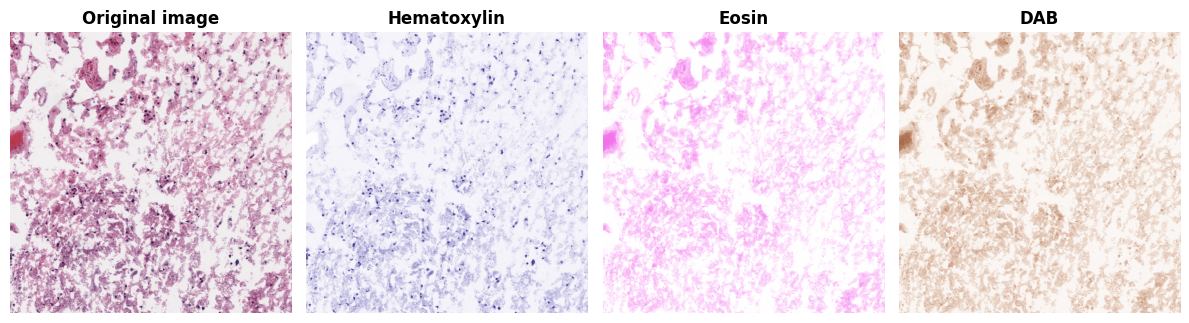

In [45]:
import matplotlib.pyplot as plt
from skimage.color import rgb2hed, hed2rgb

img = CuImage("sample.svs")
region = np.asarray(img.read_region((13317, 8195), (1600, 1600)))

#transfer our array to the device
ihc_rgb = np.asarray(region)

# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(1, 4, figsize=(12, 24), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image", fontsize=12, weight='bold')

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin", fontsize=12, weight='bold')

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin", fontsize=12, weight='bold')

ax[3].imshow(ihc_d)
ax[3].set_title("DAB", fontsize=12, weight='bold')

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

#### Patch Extraction 
Extracts small, specific image regions for model inference, with flexible handling of edge cases and overlapping patches.

---
### Feature Extraction
---

HoneyBee provides tools to extract deep features from pretrained models for downstream tasks.

---
### Use Cases
---

#### Feature Based Retrieval

#### TCGA Project Classification

# cuImage

In [30]:
from cucim import CuImage

image = CuImage("sample.svs")

print("Associated images:", image.associated_images)
print("Channel names:", image.channel_names)
print("Coordinate system:", image.coord_sys)
print("Device:", image.device)
print("Dimensions:", image.dims)
print("Direction:", image.direction)
print("Data type:", image.dtype)
print("Is loaded:", image.is_loaded)
print("Metadata:", image.metadata)
print("Number of dimensions:", image.ndim)
print("Origin:", image.origin)
print("Path:", image.path)
print("Raw metadata:", image.raw_metadata)
print("Resolutions:", image.resolutions)
print("Shape:", image.shape)
print("Type string:", image.typestr)

Associated images: {'thumbnail'}
Channel names: ['R', 'G', 'B']
Coordinate system: LPS
Device: cpu
Dimensions: YXC
Direction: [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]
Data type: <cucim.clara.DLDataType code:DLUInt(1) bits:8 lanes:1>
Is loaded: True
Metadata: {'aperio': {'AppMag': '20', 'DSR ID': 'ap1258-dsr', 'Date': '01/15/08', 'Filename': '2791', 'Header': 'Aperio Image Library v8.2.43\r\n28560x25196 [0,0 27965x25146] (240x240) JPEG/RGB Q=70', 'ImageID': '2791', 'Left': '46.376050', 'LineAreaXOffset': '0.012096', 'LineAreaYOffset': '-0.021773', 'LineCameraSkew': '0.000989', 'MPP': '0.5001', 'OriginalWidth': '28560', 'Originalheight': '25196', 'ScanScope ID': 'SS1258', 'StripeWidth': '2034', 'Time': '12:30:08', 'Title': 'none', 'Top': '20.047489', 'User': 'c63d0b3e-0ed4-4bd2-b137-81256e033d40'}, 'cucim': {'associated_images': ['thumbnail'], 'channel_names': ['R', 'G', 'B'], 'coord_sys': 'LPS', 'dims': 'YXC', 'direction': [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]], 

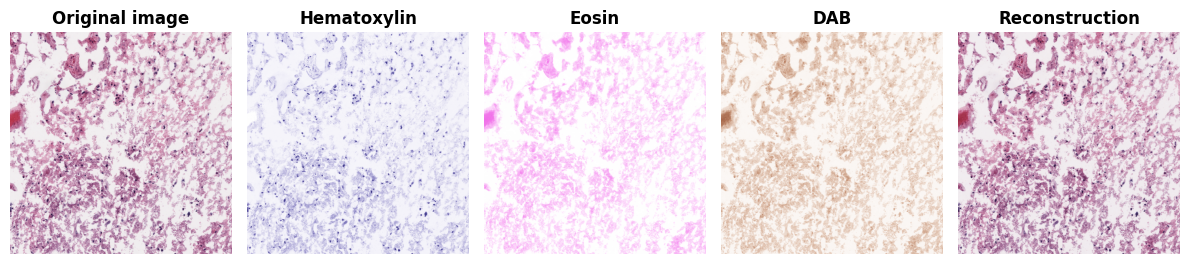

In [63]:
import matplotlib.pyplot as plt
from skimage.color import (
    rgb2hed,
    hed2rgb,
)
import numpy as np

img = CuImage("sample.svs")
region = np.asarray(img.read_region((13317, 8195), (1600, 1600)))

#transfer our array to the device
ihc_rgb = np.asarray(region)

# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# reconstruct the original image using the separated stains
ihc_hed_reconstructed = np.stack((ihc_hed[:, :, 0], ihc_hed[:, :, 1], ihc_hed[:, :, 2]), axis=-1)
ihc_rgb_reconstructed = hed2rgb(ihc_hed_reconstructed)

# Display
fig, axes = plt.subplots(1, 5, figsize=(12, 24), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image", fontsize=12, weight='bold')

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin", fontsize=12, weight='bold')

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin", fontsize=12, weight='bold')

ax[3].imshow(ihc_d)
ax[3].set_title("DAB", fontsize=12, weight='bold')

ax[4].imshow(ihc_rgb_reconstructed)
ax[4].set_title("Reconstruction", fontsize=12, weight='bold')

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()